**Introduction**

In this analysis I will determine the upregulated and downregulated genes in *E. coli* during ampicillin treatment when compared to control conditions including the stationary phase and the growth phase. My research question is to determine what genes may be interesting to study when regarding antibiotic resistance that are either highly upregulated or downregulated genes during ampicillin treatment when compared to these controls. Before I perform the analysis I must log transform the data and remove lowly expressed genes ss determined in the Task 4 exploratory data analysis. This will be followed by creating charts or graphs such as the bar chart and scatter plots to answer my research question stated above to complete my analysis.
***

**Step one:** Importing the cleaned gene expression dataset from Task 3, the project functions file. 

In [3]:
import pandas as pd
import os

os.chdir('C:/Users/eilee/course-project-solo_115')

from scripts import project_functions
data = pd.read_excel(r'data/raw/data.xlsx')
expr_df = project_functions.load_and_process(data)

import pandas as pd
import os

os.chdir('C:/Users/eilee/course-project-solo_115')

ImportError: cannot import name 'project_functions' from 'scripts' (unknown location)

In [2]:
os.getcwd()

'C:\\Users\\eilee\\course-project-solo_115'

In [2]:
# Step 2: correcting the data by filtering out lowly expressed genes.
# filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]

# filter out lowly expressed 
expr_df = expr_df.loc[expr_df.sum(axis=1) > 25, :]

In [3]:
#Step 3: Correcting the data by using log transform.
import numpy as np
expr_df['Log Stationary Phase'] = np.log(expr_df['Avg. Stationary Phase']) 
expr_df['Log Growth in Media (3h)'] = np.log(expr_df['Avg. Growth in Media (3h)']) 
expr_df['Log Media and Ampicillin (3h)'] = np.log(expr_df['Avg. Media and Ampicillin (3h)']) 

# drop coulmns of averages 
new_df = expr_df.drop(columns=['Avg. Stationary Phase', 'Avg. Growth in Media (3h)', 'Avg. Media and Ampicillin (3h)'])

C:\Users\eilee\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
new_df

,Gene Name,Gene Symbol,Log Stationary Phase,Log Growth in Media (3h),Log Media and Ampicillin (3h)
0,Km CDS,Km,9.213801,13.532037,15.204424
1,cfp CDS,cfp,8.339979,11.914666,14.020644
1403,katG CDS,katG,5.970411,12.731277,13.437997
1896,ompA CDS,ompA,6.264667,12.046626,12.697629
69,ahpF CDS,ahpF,5.205837,12.178726,12.593321
...,...,...,...,...,...
2274,renD CDS,renD,-1.791759,2.772589,2.740840
3264,ydaE CDS,ydaE,-0.405465,3.729701,2.662588
3306,yddY CDS,yddY,0.693147,3.277145,2.577688
4262,yqfG CDS,yqfG,-1.098612,3.731061,2.565206


In [5]:
# filtering out negative values caused by log transformation as these genes can also be considered lowly expressed ie log 0.5 = -1 
plotdata = new_df[new_df.select_dtypes(include=[np.number]).ge(0).all(1)]
plotdata 

,Gene Name,Gene Symbol,Log Stationary Phase,Log Growth in Media (3h),Log Media and Ampicillin (3h)
0,Km CDS,Km,9.213801,13.532037,15.204424
1,cfp CDS,cfp,8.339979,11.914666,14.020644
1403,katG CDS,katG,5.970411,12.731277,13.437997
1896,ompA CDS,ompA,6.264667,12.046626,12.697629
69,ahpF CDS,ahpF,5.205837,12.178726,12.593321
...,...,...,...,...,...
568,dicB CDS,dicB,0.510826,4.037186,3.075775
4142,yneL CDS,yneL,0.693147,4.352426,2.890372
4063,ykiC CDS,ykiC,0.104360,3.386309,2.839663
3069,ybcW CDS,ybcW,0.287682,4.248495,2.833213


array([[<AxesSubplot:title={'center':'Log Stationary Phase'}>,
        <AxesSubplot:title={'center':'Log Growth in Media (3h)'}>],
       [<AxesSubplot:title={'center':'Log Media and Ampicillin (3h)'}>,
        <AxesSubplot:>]], dtype=object)

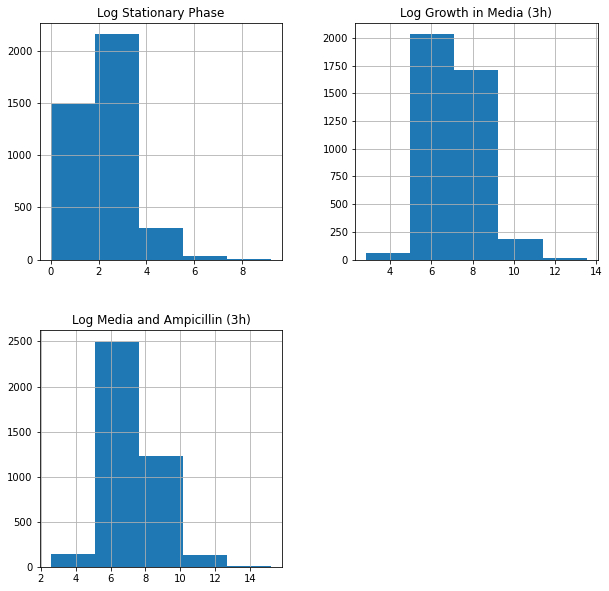

In [6]:
# Step 5: looking at the new histogram. 
hist = plotdata.hist(bins=5,figsize =(10,10))
hist

1. Log stationary phase is still skewed right.
2. Log growth and media now looks roughly normally distributed. 
3. Log media and ampicillin now looks roughly normally distributed. 

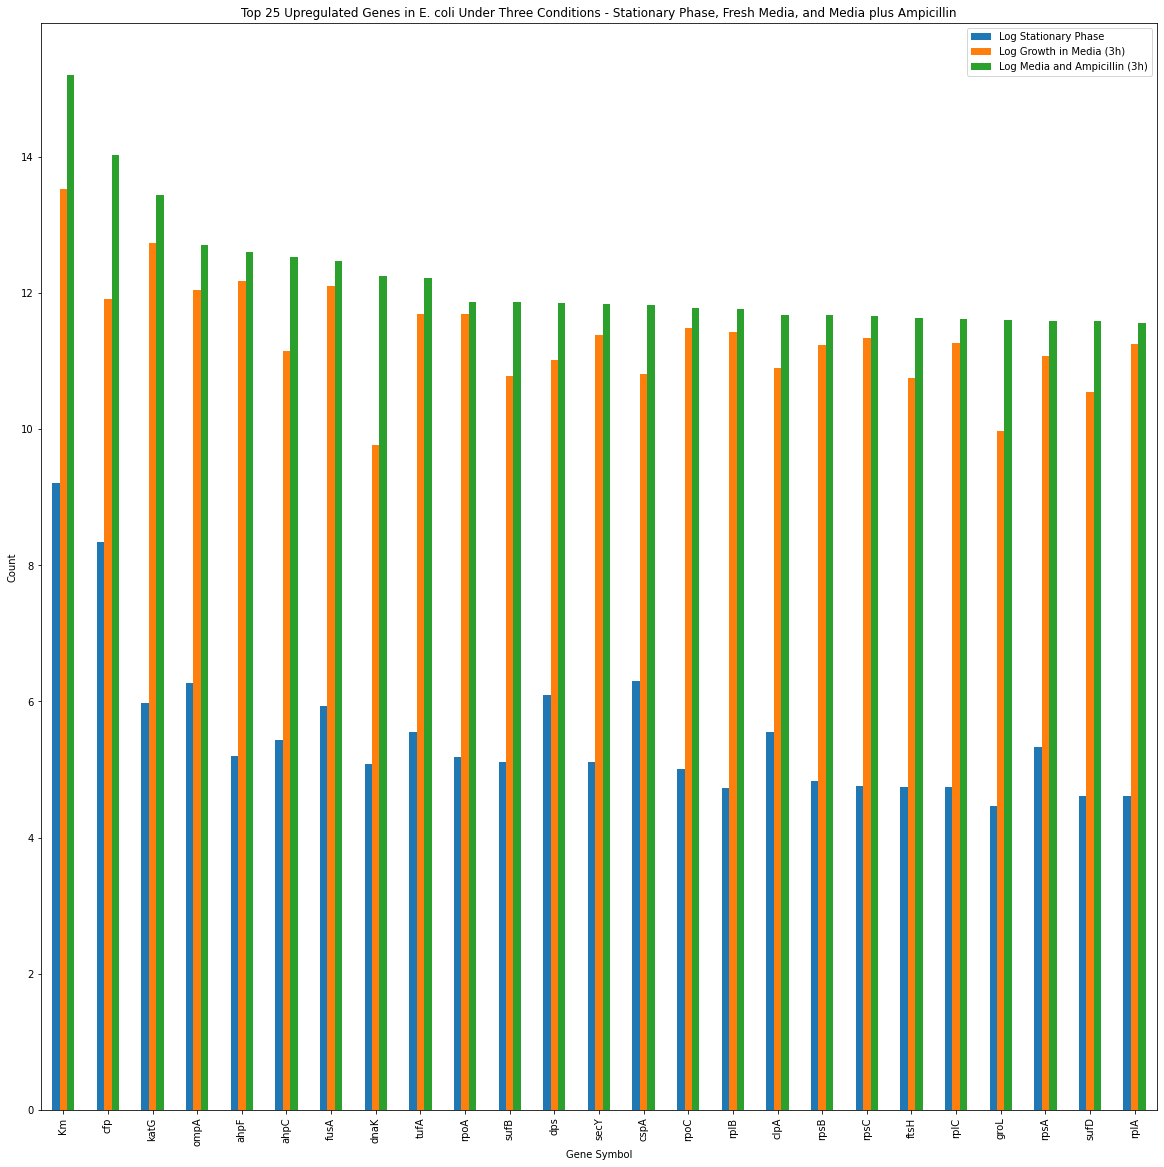

In [7]:
# Step 6: Since I am only interested in the top upregulated genes I will make a subset so this dataset is easier to work with 
pdat = plotdata.sort_values(['Log Media and Ampicillin (3h)'], ascending=False)
pdat = pdat[:25]

# Step 5: Now I can visualize the data using a bar chart to compare the three columns and see whichs genes are upregualted during ampicillin treatment. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [20, 20]

pdat.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media (3h)", "Log Media and Ampicillin (3h)"], kind="bar")

plt.title("Top 25 Upregulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Count")
plt.show()

1. The top five upregulated genes during ampiciliin treatment when compared to the stationary phase and media control are: Km, cfp, katG, ompA, and ahpF. 

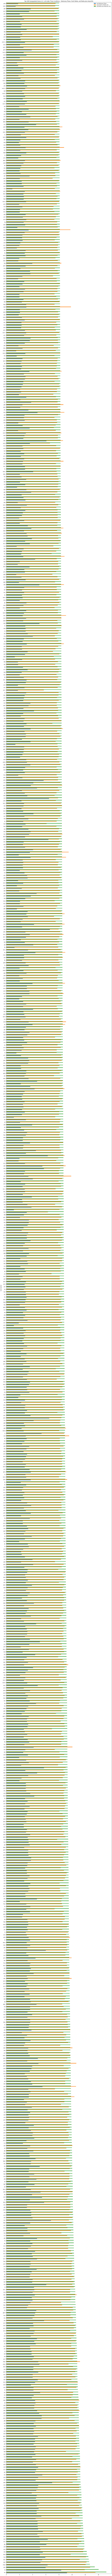

In [8]:
# Lets repeat this but in the horizontal, maybe we can see some more genes.
pdat2 = plotdata.sort_values(['Log Media and Ampicillin (3h)'], ascending=False)
pdat2 = pdat2[:1000]

plt.rcParams["figure.figsize"] = [20, 500]

pdat2.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media (3h)", "Log Media and Ampicillin (3h)"], kind="barh"
)

plt.title("Top 1000 Upregulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Gene Symbol")
plt.show()

1. Here are the top 1000 upregualted genes to visually see the difference between each condition - stationary phase, growth media, and growth media with ampicillin. 

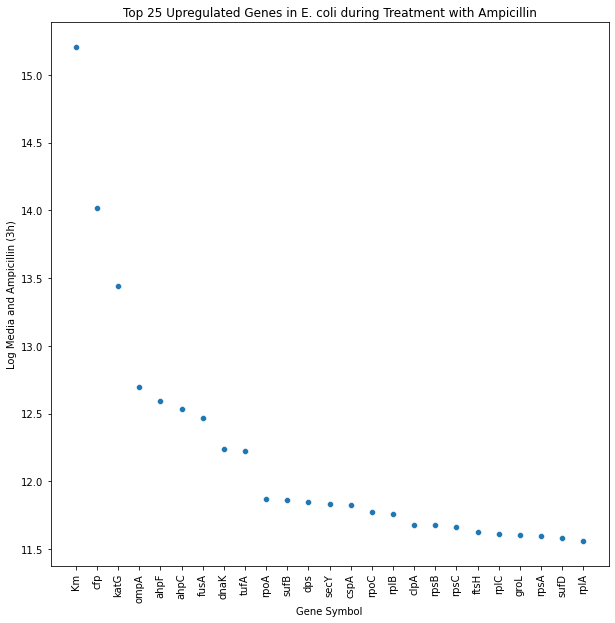

In [9]:
# Step 7: lets see how this looks as a scatter plot to compare between genes. 
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=pdat, x="Gene Symbol", y="Log Media and Ampicillin (3h)")
plt.xticks(plt.xticks()[0], rotation=90)
plt.title("Top 25 Upregulated Genes in E. coli during Treatment with Ampicillin")
plt.show()

1. Km is highly upregulated compared to the other genes. 
2. cfp is second and still much higher than the other genes. 
3. katG, ompA, ahpF, fusA follow. 

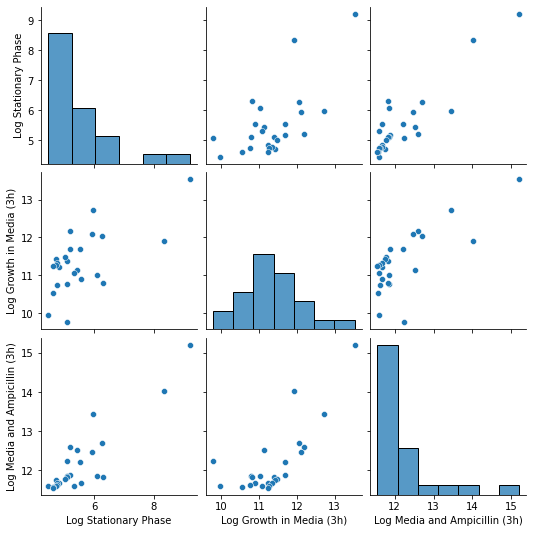

In [10]:
# Step 8: Reproducing the pair plot using the transformed data. 
sns.pairplot(pdat)

1. Most genes are expressed below 13 hits.
2. The three largest/highest points likely represetn km, cfp, and katG genes.
3. Litele gene expression during stationary phase - this makes sense as cells are resting. 

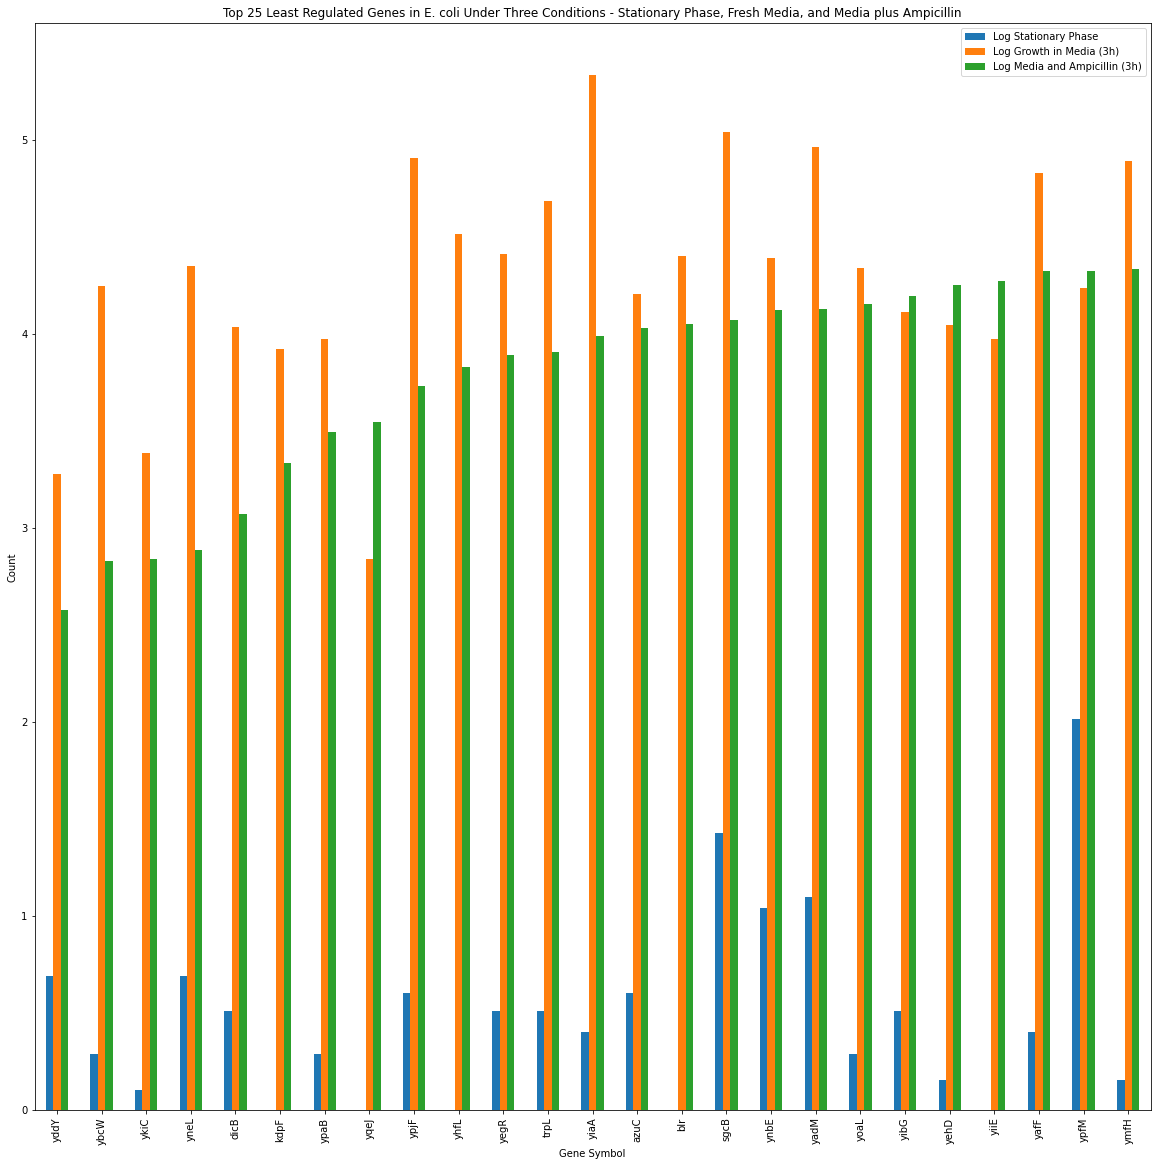

In [11]:
# Step 7: What about the least regulated genes? Perhaps that will be interesting.  
pdat_d = plotdata.sort_values(['Log Media and Ampicillin (3h)'], ascending=True)
pdat_d = pdat_d[:25]

# Step 5: Now I can visualize the data using a bar chart to compare the three columns and see whichs genes are upregualted during ampicillin treatment. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [20, 20]

pdat_d.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media (3h)", "Log Media and Ampicillin (3h)"], kind="bar")

plt.title("Top 25 Least Regulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Count")
plt.show()

1. These are downregulated genes, genes that were useful in the growth media alone when the cells were exponentially growing but have now been repressed to allow for better cell management during ampicillin treatment. 
2. The top 5 downregulated genes are yddY, ybcW, ykiC, yneL, and dicB.

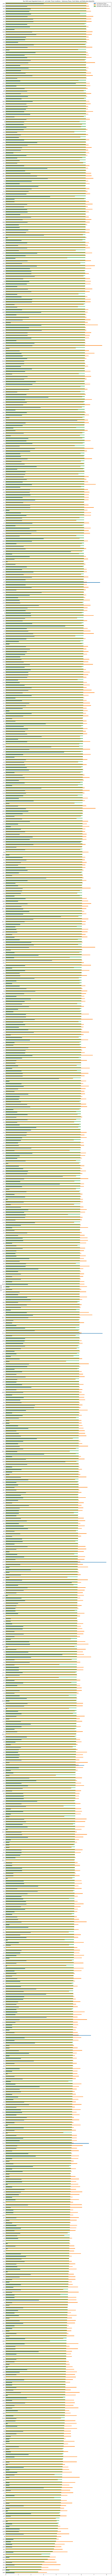

In [13]:
# Lets repeat this but in the horizontal, maybe we can see some more genes.
pdat_d2 = plotdata.sort_values(['Log Media and Ampicillin (3h)'], ascending=True)
pdat_d2 = pdat_d2[:1000]

plt.rcParams["figure.figsize"] = [20, 500]

pdat_d2.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media (3h)", "Log Media and Ampicillin (3h)"], kind="barh"
)

plt.title("Top 1000 Least Regulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Gene Symbol")
plt.show()

1. Here are the least 1000 upregulated genes.
2. Interestingly there are some genes that re only highly expressed during the stationary phase here: mqsR, bssR, mqsA, yjhQ, and bssmA.

**Conclusion**

After further processing by filtering out lowly expressed genes and log transformation I determined that the top five genes upregulated during treatment with ampicillin are: Km, cfp, katG, ompA, and ahpF and the top five least regulated genes durin ampicillin treatment are: yddY, ybcW, ykiC, yneL, and dicB.